In [1]:
import arrow
print 'Last update: %s ' % arrow.now().format('YYYY-MM-DD')

Last update: 2019-05-12 


# Signal processing
This notebook want to present the basic signal processing properties of a signal

In [2]:
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Functions

In [3]:
def compute_signal(A, f, t, phi):
    """
    Compute a sin wave signal

    Parameters
    ----------
    A: float/int
        Amplitud
    f: float/int
        frequency
    t: np.array
        time intervals
    phi: float/int
        phase of the signal

    Returns
    -------
    np.array
    """
    return A * np.sin(2 * np.pi * f * t + phi)


def compute_time_axis(fs, max_time=2):
    """
    Compute time axis of a sampled signal
    
    Parameters
    ----------
    fs: float/int
        sampling frequency
    max_time: int
        max time of the signal

    Returns
    -------
    np.array:
        timestamps of the sampled signal
    """
    ts = 1 / float(fs)
    return np.arange(0, max_time, ts)

# Create an analog signal
Initialy an analog signal $x(t)$ is created. This signal follow the expression:

$$x(t) = A · sin(2·\pi·f·t + \phi )$$

For the next example the following values are set:
 * $A$ = 1
 * $f$ = 2 Hz
 * $\phi$ = 0


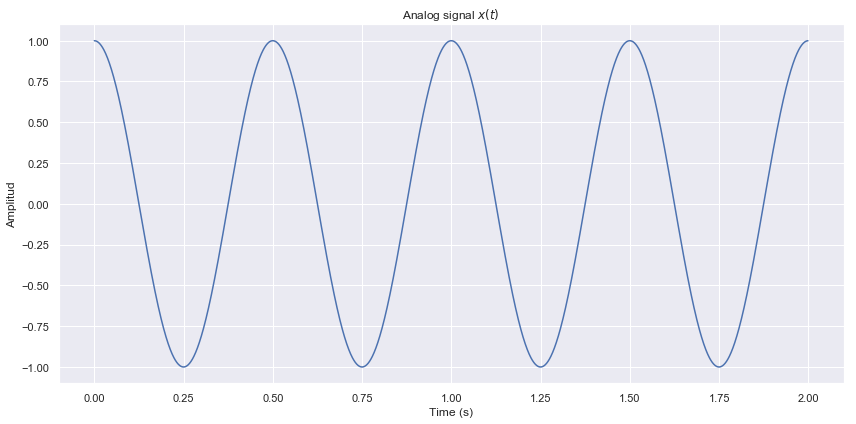

In [4]:
# create time axis
t = np.arange(0, 2, 1e-3)

# create analog signal x(t)
analog_signal = compute_signal(A=1, f=2, t=t, phi=np.pi / 2)

# plot signal x(t)
plt.figure(figsize=(12, 6))
plt.plot(t, analog_signal)
plt.title('Analog signal $x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitud')
plt.tight_layout()


# Sampling analog signal
Our digital signal $x(n)$ can be written as a function of our analog signal $x(t)$. 
 
$$x(n)=x(t) \sum_{n=-\infty}^{\infty}{\delta(t-nT)}$$

This expression is the product between our analog signal $x(t)$ and $\delta$ train. 

![](img/signal_sampling.png)

Therefore our final signal will be the points only where the signal is sampled or as a expression:
$$x(n)=x(t-nT)$$

We can have sampling at different frequencies as presented below.

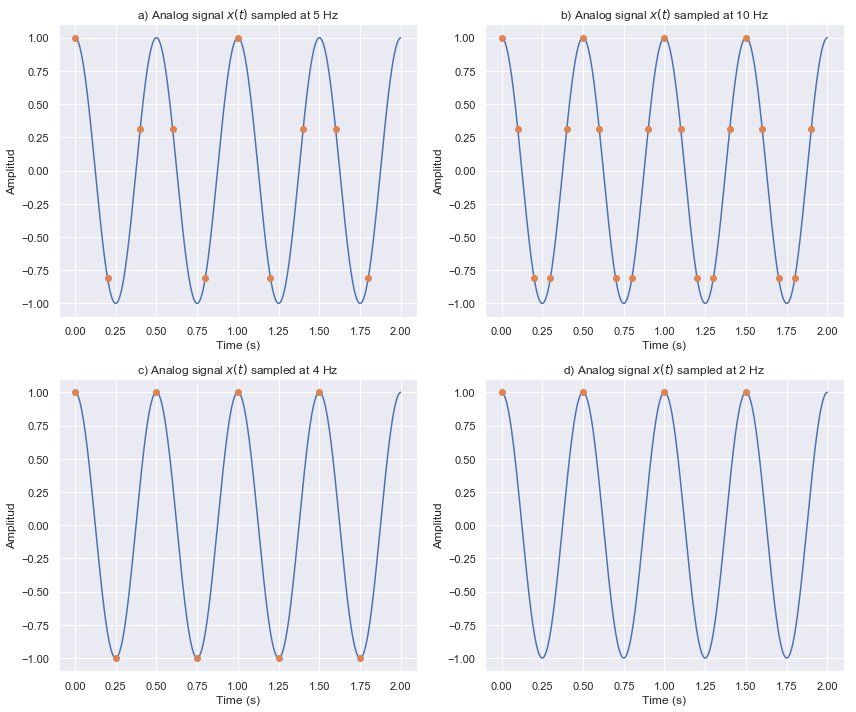

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# plot signal x(t)
frequencies = [5, 10, 4, 2]
letters = list(string.ascii_lowercase)[:len(frequencies)]

for i, (letter, f) in enumerate(zip(letters, frequencies)):
    # create sampling period
    ts = compute_time_axis(f)

    # create sampled signal
    s = compute_signal(A=1, f=2, t=ts, phi=np.pi / 2)

    ax = axs[i / 2, i % 2]
    ax.plot(t, analog_signal)
    ax.plot(ts, s, 'o')
    ax.set_title('%s) Analog signal $x(t)$ sampled at %d Hz' % (letter, f))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitud')

plt.tight_layout()
